# Neural Network Model
- A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

- load dataset

In [1]:
# import library
import tensorflow as tf
import keras
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# load data
data = pd.read_csv("../../data.csv")
# Get valuse from data (datafram)
data = data.values
X = data[:,0:6] # all rows, no Lebal
y = data[:,6] # all rows, label only

- expand dataset features

In [2]:
# Define PolynomialFeatures variable with degree 5 and without bias
poly = PolynomialFeatures(degree=2 , include_bias=False)
X=poly.fit_transform(X)
X.shape

(11077, 27)

- split dataset to train and test dataset
    - with ratio 75% to train the dataset and 20% to the test dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape

(8861, 27)

#### Neural Network Model
- create the Neural Network Model
- compile the Neural Network Model
- train(Fit) the model
- print the model summary
- Predict the output of X_test using Neural Network Model

##### create a model
- Flatten layer
- fully-connected layer (dense) with 64 nodes and swish activation function
- fully-connected layer (dense) with 128 nodes and swish activation function
- fully-connected layer (dense) with 128 nodes and sigmoid activation function
- fully-connected layer (dense) with 64 nodes and tanh activation function
- fully-connected layer (dense) with 16 nodes and tanh activation function
- fully-connected layer (dense) with 7 nodes and softmax activation function

In [4]:
model = keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64, activation=tf.nn.swish),
                                tf.keras.layers.Dense(128, activation=tf.nn.swish),
                                tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
                                tf.keras.layers.Dense(64, activation=tf.nn.tanh),
                                tf.keras.layers.Dense(16, activation=tf.nn.tanh),
                                tf.keras.layers.Dense(7, activation=tf.nn.softmax)
                                   ])


##### compile the Neural Network Model
- optimizer = adam
- sparse_categorical_crossentropy loss function 

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### train(Fit) the model with (epoch = 80)

In [6]:
hist=model.fit(X_train, y_train, epochs=80)

Epoch 1/80
277/277 [==============================] - 0s 1ms/step - loss: 1.3294 - accuracy: 0.4821
Epoch 2/80
277/277 [==============================] - 0s 1ms/step - loss: 1.0241 - accuracy: 0.6029
Epoch 3/80
277/277 [==============================] - 0s 1ms/step - loss: 0.9494 - accuracy: 0.6344
Epoch 4/80
277/277 [==============================] - 0s 1ms/step - loss: 0.9051 - accuracy: 0.6530: 0s - loss: 0.8894 - accu
Epoch 5/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8767 - accuracy: 0.6585
Epoch 6/80
277/277 [==============================] - ETA: 0s - loss: 0.8584 - accuracy: 0.66 - 0s 1ms/step - loss: 0.8574 - accuracy: 0.6675
Epoch 7/80
277/277 [==============================] - ETA: 0s - loss: 0.8345 - accuracy: 0.67 - 0s 1ms/step - loss: 0.8266 - accuracy: 0.6811
Epoch 8/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8220 - accuracy: 0.6858: 0s - loss: 0.8244 - accuracy
Epoch 9/80
277/277 [==============================] - 0s 1ms

277/277 [==============================] - 1s 2ms/step - loss: 0.2763 - accuracy: 0.8976


##### print the model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 27)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1792      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1

##### Predict the output of X_test using Neural Network Model

In [8]:
y_predict=model.predict_classes(X_test)
print('predicted value = ',y_predict[0])
print('actual value = ', y_test[0])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted value =  3
actual value =  3.0


#### Evaluate Model 
- calculate the evaluate model accuracy and loss (accuracy = 0.7658 , loss = 0.8492 ) 
- plot the training loss matrix
- plot the training accuracy matrix
- clasification report 

In [9]:
# calculate the evaluate model accuracy and loss 
# (accuracy = 0.7658 , loss = 0.8492 )
val_loss, val_acc = model.evaluate(X_test, y_test)

70/70 [==============================] - 0s 663us/step - loss: 0.8687 - accuracy: 0.7622


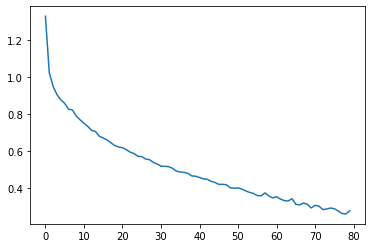

In [10]:
# plot the training loss matrix
plt.plot(hist.history['loss'])

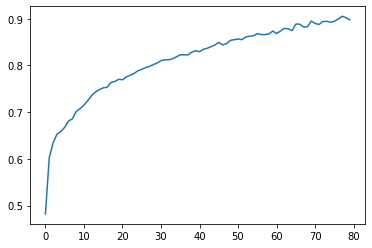

In [11]:
# plot the training accuracy matrix
plt.plot(hist.history['accuracy'])

In [12]:
# clasification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       0.86      0.85      0.85       404
         2.0       0.87      0.89      0.88       377
         3.0       0.74      0.72      0.73       530
         4.0       0.53      0.53      0.53       164
         5.0       0.77      0.81      0.79       302
         6.0       0.69      0.68      0.69       439

    accuracy                           0.76      2216
   macro avg       0.74      0.75      0.74      2216
weighted avg       0.76      0.76      0.76      2216



#### save the model after training.
- so we can load it and run without the need to train anymore

In [13]:
keras.models.save_model(model,'NNM.h5')
# model.save(
#     'saved_model',
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None,
# )

#### load the model and predict the result

In [14]:
#load_model = keras.models.load_model('saved_model')
load_model = keras.models.load_model('NNM.h5')
load_y_predict=load_model.predict_classes(X_test)
load_y_predict[0]

3

- Evaluate the loaded model with classification_report

In [15]:
print(classification_report(y_test, load_y_predict))

              precision    recall  f1-score   support

         1.0       0.86      0.85      0.85       404
         2.0       0.87      0.89      0.88       377
         3.0       0.74      0.72      0.73       530
         4.0       0.53      0.53      0.53       164
         5.0       0.77      0.81      0.79       302
         6.0       0.69      0.68      0.69       439

    accuracy                           0.76      2216
   macro avg       0.74      0.75      0.74      2216
weighted avg       0.76      0.76      0.76      2216

